In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
book=pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


# Apriori Algorithm


### Association rules with 5% Support and 80% confidence

In [3]:
# With 5% Support
frequent_itemsets=apriori(book,min_support=0.05,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, GeogBks, CookBks, YouthBks)"
96,0.0560,"(ArtBks, GeogBks, CookBks, YouthBks)"
97,0.0650,"(ArtBks, DoItYBks, CookBks, GeogBks)"
98,0.0510,"(DoItYBks, YouthBks, GeogBks, ChildBks, CookBks)"


In [4]:
# with 80% confidence
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(CookBks, GeogBks, ChildBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(ArtBks),"(CookBks, DoItYBks, ChildBks, GeogBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
659,(GeogBks),"(CookBks, DoItYBks, ChildBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(ChildBks),"(CookBks, DoItYBks, ArtBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


In [5]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
183,(ItalCook),"(CookBks, YouthBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
182,"(CookBks, YouthBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
511,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
510,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
513,"(ChildBks, CookBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
14,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
15,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069


In [6]:
# Lift Ratio > 1 is a good influential rule in selecting the associated transactions
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(CookBks, GeogBks, ChildBks, ArtBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(ArtBks),"(CookBks, DoItYBks, ChildBks, GeogBks)",0.2410,0.0890,0.0535,0.221992,2.494289,0.032051,1.170939
659,(GeogBks),"(CookBks, DoItYBks, ChildBks, ArtBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(ChildBks),"(CookBks, DoItYBks, ArtBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


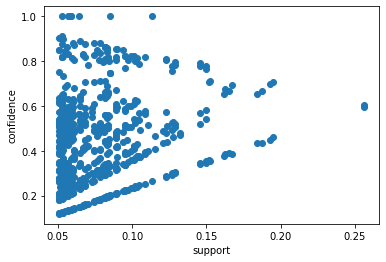

In [7]:
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

###  Association rules with 10% Support and 70% confidence

In [8]:
# With 10% Support
frequent_itemsets2=apriori(book,min_support=0.10,use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [9]:
# With 70% confidence
rules2=association_rules(frequent_itemsets2,metric='lift',min_threshold=0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
96,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
97,(ArtBks),"(GeogBks, CookBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
98,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800


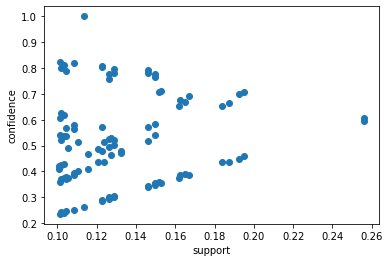

In [10]:
plt.scatter(rules2['support'],rules2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()